In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

# Fetch historical stock data for Apple (AAPL)
data = yf.download('AAPL', start='2010-01-01', end='2025-01-01')

# Fix column names if they have a multi-index
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)  # Extract primary names

# Display first few rows
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Date                                                         
2010-01-04  6.440329  6.455075  6.391277  6.422875  493729600
2010-01-05  6.451466  6.487879  6.417459  6.458086  601904800
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000
2010-01-07  6.337111  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379242  6.379844  6.291369  6.328685  447610800


In [4]:
import numpy as np

# Create the target variable (shift Close price by -1 day)
data['Next Close'] = data['Close'].shift(-1)

# Drop last row since it will have NaN in 'Next Close'
data.dropna(inplace=True)

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Next Close']

# Split into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")


Training size: (3018, 5), Testing size: (755, 5)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_preds = lr_model.predict(X_test)

# Evaluate model performance
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

print(f'Linear Regression - MAE: {lr_mae:.4f}, RMSE: {lr_rmse:.4f}')


Linear Regression - MAE: 0.8570, RMSE: 1.6629


In [7]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_preds = dt_model.predict(X_test)

# Evaluate model performance
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))

print(f'Decision Tree - MAE: {dt_mae:.4f}, RMSE: {dt_rmse:.4f}')


Decision Tree - MAE: 1.2939, RMSE: 2.4109


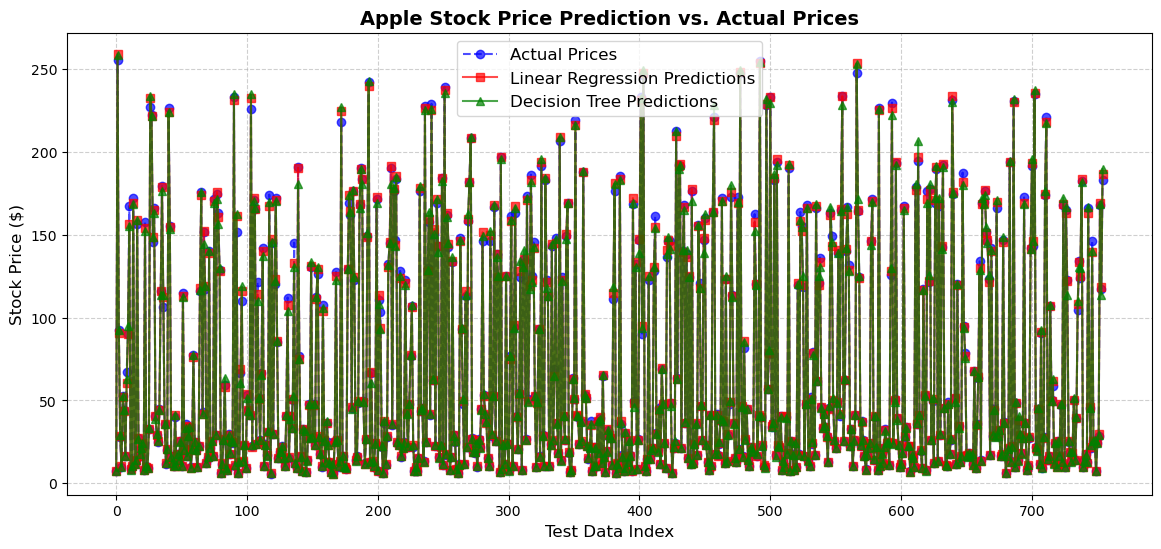

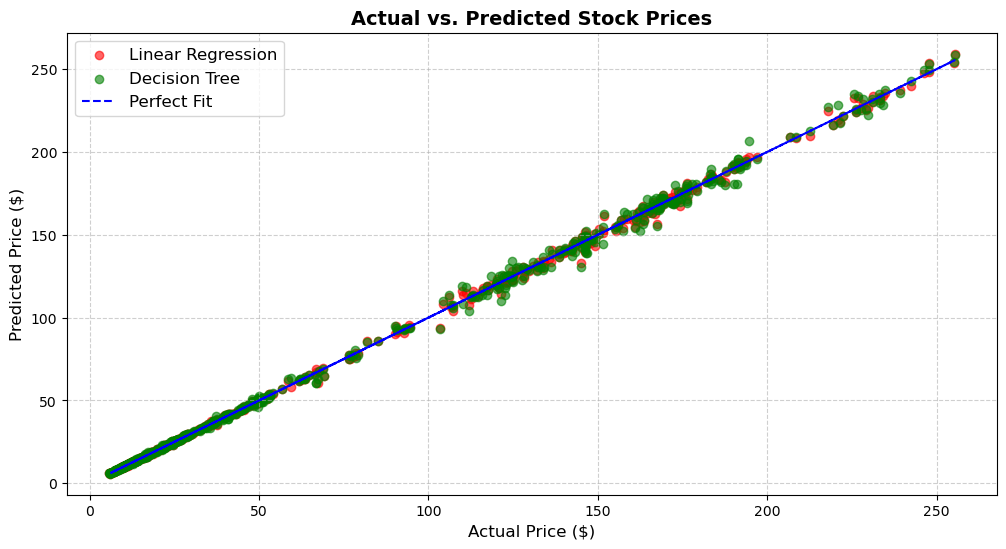

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot actual prices
plt.plot(y_test.values, label="Actual Prices", color="blue", linestyle="dashed", marker='o', alpha=0.7)

# Plot Linear Regression predictions
plt.plot(lr_preds, label="Linear Regression Predictions", color="red", marker='s', alpha=0.7)

# Plot Decision Tree predictions
plt.plot(dt_preds, label="Decision Tree Predictions", color="green", marker='^', alpha=0.7)

# Improve readability
plt.title("Apple Stock Price Prediction vs. Actual Prices", fontsize=14, fontweight='bold')
plt.xlabel("Test Data Index", fontsize=12)
plt.ylabel("Stock Price ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()
plt.figure(figsize=(12,6))

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, lr_preds, label="Linear Regression", color="red", alpha=0.6)
plt.scatter(y_test, dt_preds, label="Decision Tree", color="green", alpha=0.6)

# Perfect prediction line (y = x)
plt.plot(y_test, y_test, color="blue", linestyle="dashed", label="Perfect Fit")

# Labels and title
plt.title("Actual vs. Predicted Stock Prices", fontsize=14, fontweight='bold')
plt.xlabel("Actual Price ($)", fontsize=12)
plt.ylabel("Predicted Price ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


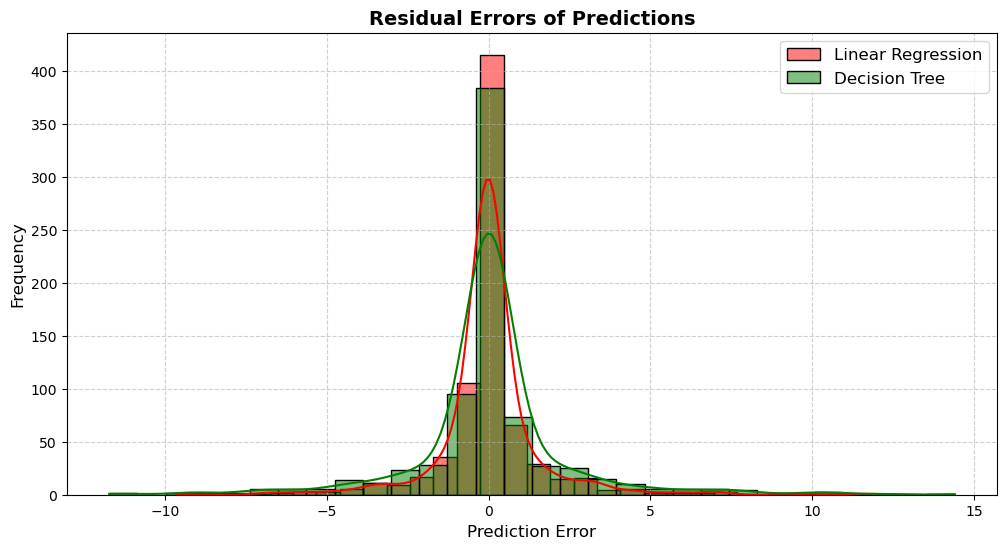

In [10]:
import seaborn as sns

plt.figure(figsize=(12,6))

# Compute residuals (error)
lr_residuals = y_test - lr_preds
dt_residuals = y_test - dt_preds

# Plot residuals
sns.histplot(lr_residuals, bins=30, color="red", label="Linear Regression", kde=True)
sns.histplot(dt_residuals, bins=30, color="green", label="Decision Tree", kde=True)

# Labels
plt.title("Residual Errors of Predictions", fontsize=14, fontweight='bold')
plt.xlabel("Prediction Error", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


🚀 Extracting stock data...


[*********************100%***********************]  1 of 1 completed
C:\Users\KIIT\AppData\Local\Temp\ipykernel_7036\2955699997.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Next_Close'] = data['Close'].shift(-1)  # Predict next day's close
C:\Users\KIIT\AppData\Local\Temp\ipykernel_7036\2955699997.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


🧹 Transforming data...
📦 Training models...
📊 Visualizing results...


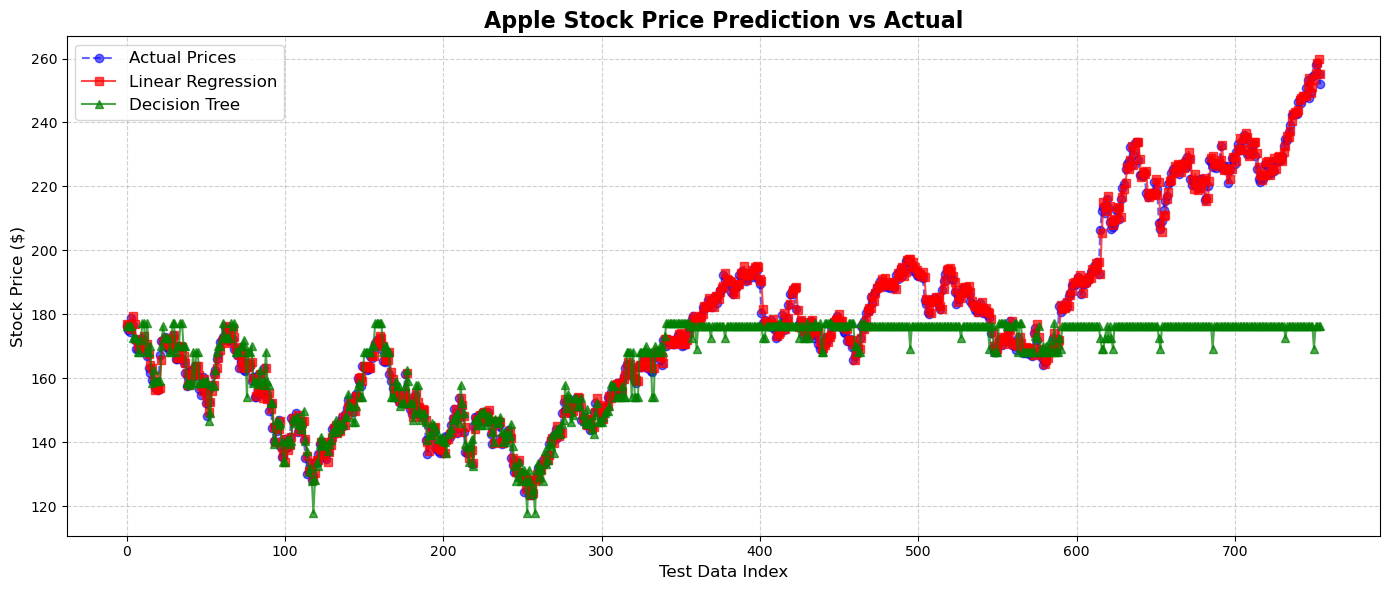


📊 Evaluation Metrics:
Linear Regression:
 - RMSE: 2.90
 - R2 Score: 0.9903

Decision Tree Regression:
 - RMSE: 23.60
 - R2 Score: 0.3570


In [11]:
# === ETL PIPELINE FOR APPLE STOCK PREDICTION ===
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# E: EXTRACT
# -----------------------------
def extract_stock_data(ticker="AAPL", start="2010-01-01", end="2024-12-31"):
    data = yf.download(ticker, start=start, end=end)
    data.reset_index(inplace=True)
    return data

# -----------------------------
# T: TRANSFORM
# -----------------------------
def transform_data(data):
    # Keep only relevant columns
    data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

    # Feature Engineering
    data['Next_Close'] = data['Close'].shift(-1)  # Predict next day's close
    data.dropna(inplace=True)

    features = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    target = data['Next_Close']

    return features, target, data

# -----------------------------
# L: LOAD / TRAIN MODEL
# -----------------------------
def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train models
    lr_model = LinearRegression()
    dt_model = DecisionTreeRegressor()

    lr_model.fit(X_train, y_train)
    dt_model.fit(X_train, y_train)

    # Predictions
    lr_preds = lr_model.predict(X_test)
    dt_preds = dt_model.predict(X_test)

    return y_test, lr_preds, dt_preds

# -----------------------------
# Evaluation and Visualization
# -----------------------------
def visualize_results(y_test, lr_preds, dt_preds):
    plt.figure(figsize=(14, 6))

    plt.plot(y_test.values, label="Actual Prices", color="blue", linestyle="dashed", marker='o', alpha=0.6)
    plt.plot(lr_preds, label="Linear Regression", color="red", marker='s', alpha=0.7)
    plt.plot(dt_preds, label="Decision Tree", color="green", marker='^', alpha=0.7)

    plt.title("Apple Stock Price Prediction vs Actual", fontsize=16, fontweight='bold')
    plt.xlabel("Test Data Index", fontsize=12)
    plt.ylabel("Stock Price ($)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Metrics
    print("\n📊 Evaluation Metrics:")
    print("Linear Regression:")
    print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, lr_preds)):.2f}")
    print(f" - R2 Score: {r2_score(y_test, lr_preds):.4f}")

    print("\nDecision Tree Regression:")
    print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, dt_preds)):.2f}")
    print(f" - R2 Score: {r2_score(y_test, dt_preds):.4f}")

# -----------------------------
# RUN THE PIPELINE
# -----------------------------
def run_etl_pipeline():
    print("🚀 Extracting stock data...")
    raw_data = extract_stock_data()

    print("🧹 Transforming data...")
    X, y, transformed_data = transform_data(raw_data)

    print("📦 Training models...")
    y_test, lr_preds, dt_preds = train_models(X, y)

    print("📊 Visualizing results...")
    visualize_results(y_test, lr_preds, dt_preds)

# Execute pipeline
if __name__ == "__main__":
    run_etl_pipeline()


In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


🚀 Extracting stock data...


[*********************100%***********************]  1 of 1 completed

🧹 Transforming data...
📦 Training models...



C:\Users\KIIT\AppData\Local\Temp\ipykernel_7036\3175952330.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Next_Close'] = data['Close'].shift(-1)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_7036\3175952330.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


📊 Visualizing and evaluating...


C:\Users\KIIT\AppData\Local\Temp\ipykernel_7036\3175952330.py:89: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\KIIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


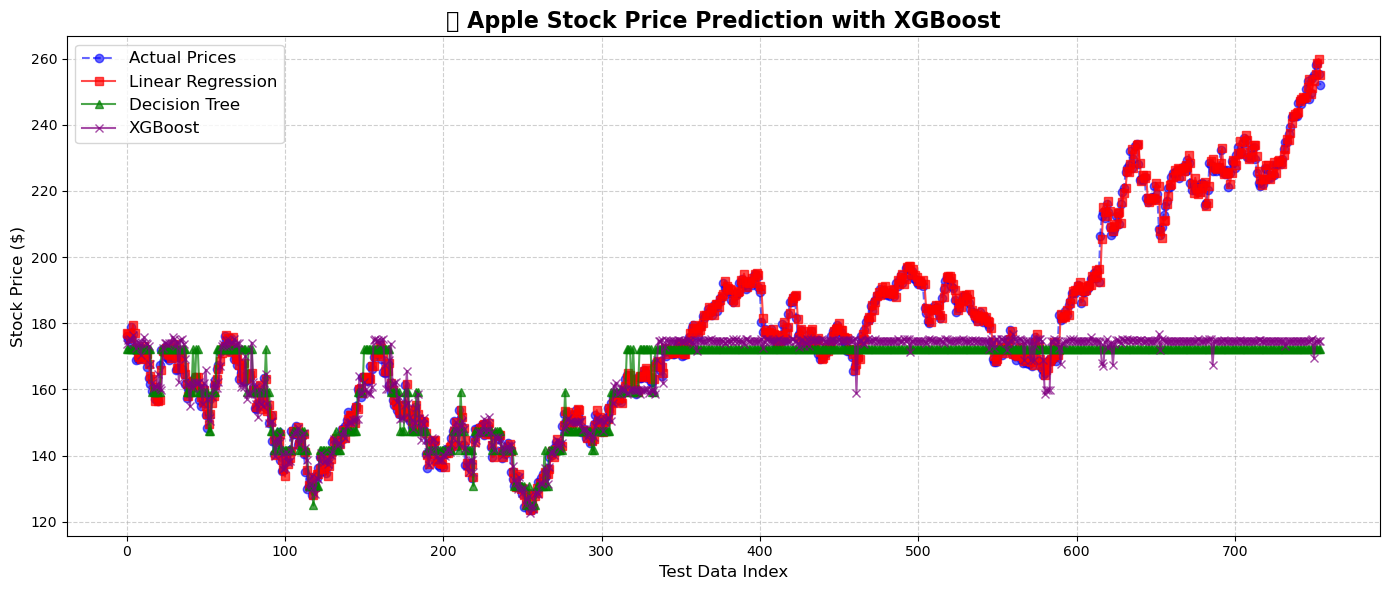


📊 Evaluation Metrics:
Linear Regression:
 - RMSE: 2.90
 - R2 Score: 0.9903

Decision Tree:
 - RMSE: 25.52
 - R2 Score: 0.2479

XGBoost:
 - RMSE: 24.29
 - R2 Score: 0.3189


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# E: EXTRACT
# -----------------------------
def extract_stock_data(ticker="AAPL", start="2010-01-01", end="2024-12-31"):
    data = yf.download(ticker, start=start, end=end)
    data.reset_index(inplace=True)
    return data

# -----------------------------
# T: TRANSFORM
# -----------------------------
def transform_data(data):
    data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    data['Next_Close'] = data['Close'].shift(-1)
    data.dropna(inplace=True)
    features = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    target = data['Next_Close']
    return features, target, data

# -----------------------------
# L: LOAD / TRAIN MODELS
# -----------------------------
def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_preds = lr_model.predict(X_test)

    # Decision Tree Regressor (tuned)
    dt_model = DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    )
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)

    # XGBoost Regressor
    xgb_model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
    )
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_test)

    return y_test, lr_preds, dt_preds, xgb_preds

# -----------------------------
# VISUALIZE + EVALUATE
# -----------------------------
def visualize_results(y_test, lr_preds, dt_preds, xgb_preds):
    plt.figure(figsize=(14, 6))

    # Actual prices
    plt.plot(y_test.values, label="Actual Prices", color="blue", linestyle="dashed", marker='o', alpha=0.6)

    # Linear Regression
    plt.plot(lr_preds, label="Linear Regression", color="red", marker='s', alpha=0.7)

    # Decision Tree
    plt.plot(dt_preds, label="Decision Tree", color="green", marker='^', alpha=0.7)

    # XGBoost
    plt.plot(xgb_preds, label="XGBoost", color="purple", marker='x', alpha=0.7)

    plt.title("📈 Apple Stock Price Prediction with XGBoost", fontsize=16, fontweight='bold')
    plt.xlabel("Test Data Index", fontsize=12)
    plt.ylabel("Stock Price ($)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Evaluation
    print("\n📊 Evaluation Metrics:")
    print("Linear Regression:")
    print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, lr_preds)):.2f}")
    print(f" - R2 Score: {r2_score(y_test, lr_preds):.4f}")
    
    print("\nDecision Tree:")
    print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, dt_preds)):.2f}")
    print(f" - R2 Score: {r2_score(y_test, dt_preds):.4f}")
    
    print("\nXGBoost:")
    print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, xgb_preds)):.2f}")
    print(f" - R2 Score: {r2_score(y_test, xgb_preds):.4f}")

# -----------------------------
# RUN PIPELINE
# -----------------------------
def run_etl_pipeline():
    print("🚀 Extracting stock data...")
    raw_data = extract_stock_data()

    print("🧹 Transforming data...")
    X, y, transformed_data = transform_data(raw_data)

    print("📦 Training models...")
    y_test, lr_preds, dt_preds, xgb_preds = train_models(X, y)

    print("📊 Visualizing and evaluating...")
    visualize_results(y_test, lr_preds, dt_preds, xgb_preds)

# 🔥 Run pipeline
run_etl_pipeline()


📥 Extracting data...


[*********************100%***********************]  1 of 1 completed

🔧 Transforming data...


🧠 Training models...
📈 Visualizing results...


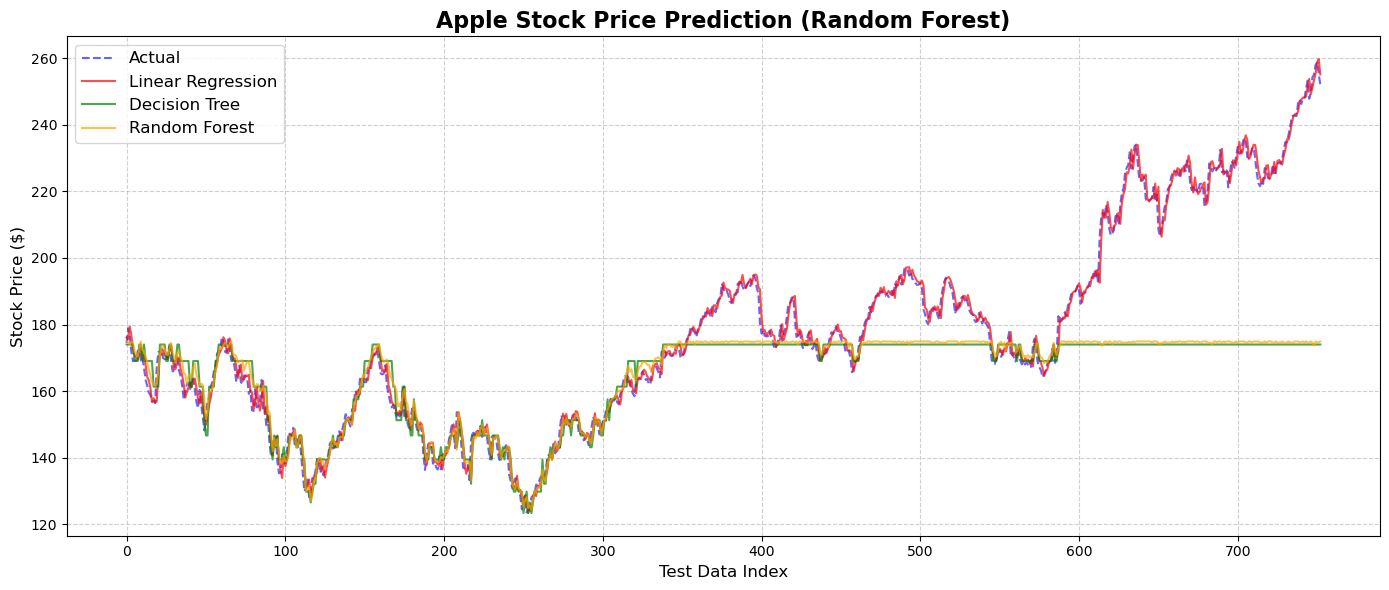


📊 Evaluation Metrics:
Linear Regression:
 - RMSE: 2.90
 - R² Score: 0.9903

Decision Tree:
 - RMSE: 24.53
 - R² Score: 0.3069

Random Forest:
 - RMSE: 24.10
 - R² Score: 0.3313


In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# E: Extract
# -----------------------------
def extract_stock_data(ticker="AAPL", start="2010-01-01", end="2024-12-31"):
    data = yf.download(ticker, start=start, end=end)
    data.reset_index(inplace=True)
    return data

# -----------------------------
# T: Transform + Feature Engineering
# -----------------------------
def transform_data(data):
    df = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()

    # Add features
    df['Price Change'] = df['Close'] - df['Open']
    df['5d MA'] = df['Close'].rolling(window=5).mean()
    df['10d MA'] = df['Close'].rolling(window=10).mean()

    # Drop initial NA values caused by moving averages
    df.dropna(inplace=True)

    # Target: Next day's closing price
    df['Next_Close'] = df['Close'].shift(-1)
    df.dropna(inplace=True)

    features = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Price Change', '5d MA', '10d MA']]
    target = df['Next_Close']
    return features, target, df

# -----------------------------
# L: Load / Train Models
# -----------------------------
def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_preds = lr_model.predict(X_test)

    # Tuned Decision Tree
    dt_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, random_state=42)
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)

    # Tuned Random Forest
    rf_model = RandomForestRegressor(
        n_estimators=150,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=4,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)

    return y_test, lr_preds, dt_preds, rf_preds

# -----------------------------
# Evaluate + Visualize
# -----------------------------
def visualize_results(y_test, lr_preds, dt_preds, rf_preds):
    plt.figure(figsize=(14, 6))

    plt.plot(y_test.values, label="Actual", color="blue", linestyle="dashed", alpha=0.6)
    plt.plot(lr_preds, label="Linear Regression", color="red", alpha=0.7)
    plt.plot(dt_preds, label="Decision Tree", color="green", alpha=0.7)
    plt.plot(rf_preds, label="Random Forest", color="orange", alpha=0.7)

    plt.title("Apple Stock Price Prediction (Random Forest)", fontsize=16, fontweight='bold')
    plt.xlabel("Test Data Index", fontsize=12)
    plt.ylabel("Stock Price ($)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\n📊 Evaluation Metrics:")
    print("Linear Regression:")
    print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, lr_preds)):.2f}")
    print(f" - R² Score: {r2_score(y_test, lr_preds):.4f}")

    print("\nDecision Tree:")
    print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, dt_preds)):.2f}")
    print(f" - R² Score: {r2_score(y_test, dt_preds):.4f}")

    print("\nRandom Forest:")
    print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, rf_preds)):.2f}")
    print(f" - R² Score: {r2_score(y_test, rf_preds):.4f}")

# -----------------------------
# Run Pipeline
# -----------------------------
def run_etl_pipeline():
    print("📥 Extracting data...")
    raw_data = extract_stock_data()

    print("🔧 Transforming data...")
    X, y, _ = transform_data(raw_data)

    print("🧠 Training models...")
    y_test, lr_preds, dt_preds, rf_preds = train_models(X, y)

    print("📈 Visualizing results...")
    visualize_results(y_test, lr_preds, dt_preds, rf_preds)

# 🔁 Execute
run_etl_pipeline()


[*********************100%***********************]  1 of 1 completed

📥 Extracting data...
🔧 Transforming data...
🧠 Training models...


📈 Visualizing results...


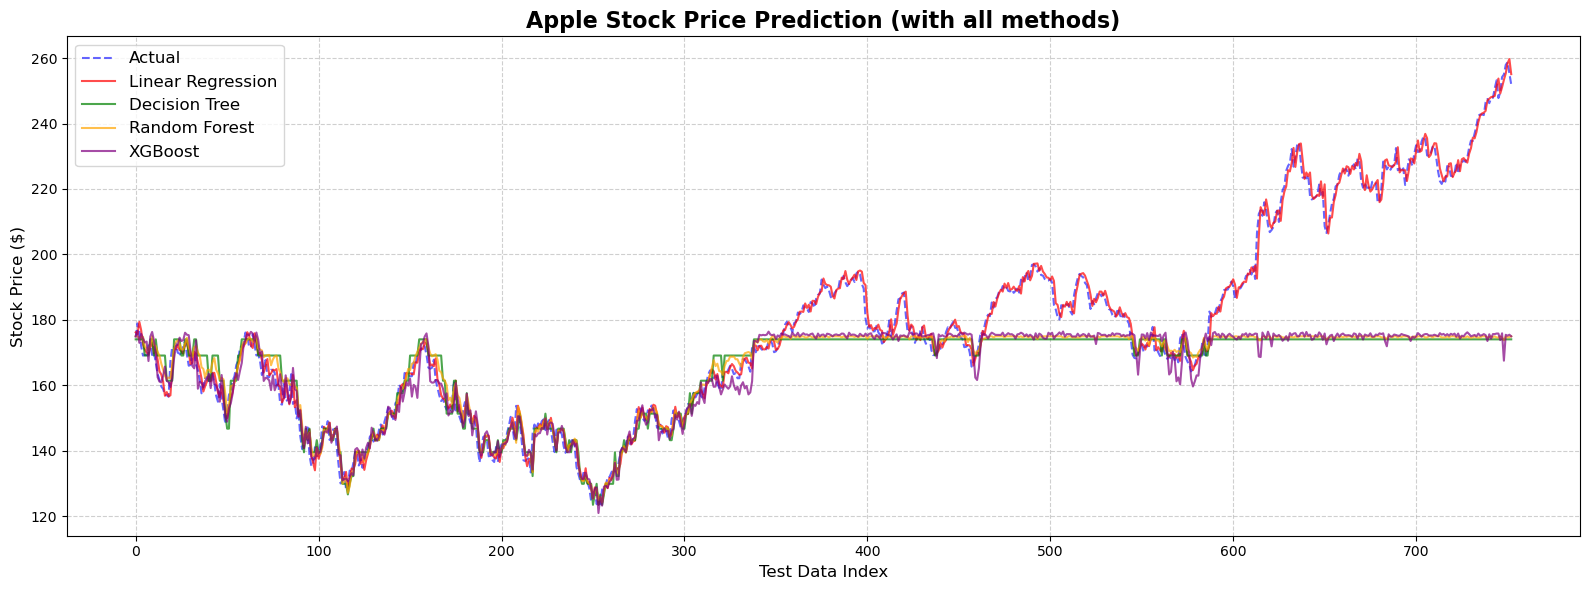


📊 Evaluation Metrics:
Linear Regression:
 - RMSE: 2.90
 - R² Score: 0.9903

Decision Tree:
 - RMSE: 24.53
 - R² Score: 0.3069

Random Forest:
 - RMSE: 24.10
 - R² Score: 0.3313

XGBoost:
 - RMSE: 24.00
 - R² Score: 0.3368



In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# E: Extract
# -----------------------------
def extract_stock_data(ticker="AAPL", start="2010-01-01", end="2024-12-31"):
    data = yf.download(ticker, start=start, end=end)
    data.reset_index(inplace=True)
    return data

# -----------------------------
# T: Transform + Feature Engineering
# -----------------------------
def transform_data(data):
    df = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()

    df['Price Change'] = df['Close'] - df['Open']
    df['5d MA'] = df['Close'].rolling(window=5).mean()
    df['10d MA'] = df['Close'].rolling(window=10).mean()

    df.dropna(inplace=True)

    df['Next_Close'] = df['Close'].shift(-1)
    df.dropna(inplace=True)

    features = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Price Change', '5d MA', '10d MA']]
    target = df['Next_Close']
    return features, target, df

# -----------------------------
# L: Load / Train Models
# -----------------------------
def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_preds = lr_model.predict(X_test)

    # Decision Tree
    dt_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, random_state=42)
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)

    # Random Forest
    rf_model = RandomForestRegressor(
        n_estimators=150,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=4,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)

    # XGBoost
    xgb_model = XGBRegressor(
        n_estimators=150,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_test)

    return y_test, lr_preds, dt_preds, rf_preds, xgb_preds

# -----------------------------
# Evaluate + Visualize
# -----------------------------
def visualize_results(y_test, lr_preds, dt_preds, rf_preds, xgb_preds):
    plt.figure(figsize=(16, 6))

    plt.plot(y_test.values, label="Actual", color="blue", linestyle="dashed", alpha=0.6)
    plt.plot(lr_preds, label="Linear Regression", color="red", alpha=0.7)
    plt.plot(dt_preds, label="Decision Tree", color="green", alpha=0.7)
    plt.plot(rf_preds, label="Random Forest", color="orange", alpha=0.7)
    plt.plot(xgb_preds, label="XGBoost", color="purple", alpha=0.7)

    plt.title("Apple Stock Price Prediction (with all methods)", fontsize=16, fontweight='bold')
    plt.xlabel("Test Data Index", fontsize=12)
    plt.ylabel("Stock Price ($)", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print("\n📊 Evaluation Metrics:")
    for name, preds in zip(["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
                           [lr_preds, dt_preds, rf_preds, xgb_preds]):
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)
        print(f"{name}:\n - RMSE: {rmse:.2f}\n - R² Score: {r2:.4f}\n")

# -----------------------------
# Run ETL + Training
# -----------------------------
def run_etl_pipeline():
    print("📥 Extracting data...")
    raw_data = extract_stock_data()

    print("🔧 Transforming data...")
    X, y, _ = transform_data(raw_data)

    print("🧠 Training models...")
    y_test, lr_preds, dt_preds, rf_preds, xgb_preds = train_models(X, y)

    print("📈 Visualizing results...")
    visualize_results(y_test, lr_preds, dt_preds, rf_preds, xgb_preds)

# 🔁 Execute
run_etl_pipeline()


2025-04-08 06:57:27.509 
  command:

    streamlit run C:\Users\KIIT\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
[*********************100%***********************]  1 of 1 completed
C:\Users\KIIT\AppData\Local\Temp\ipykernel_7036\1889783199.py:32: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop('Next Close', axis=1)
2025-04-08 06:57:28.111 Session state does not function when running a script without `streamlit run`


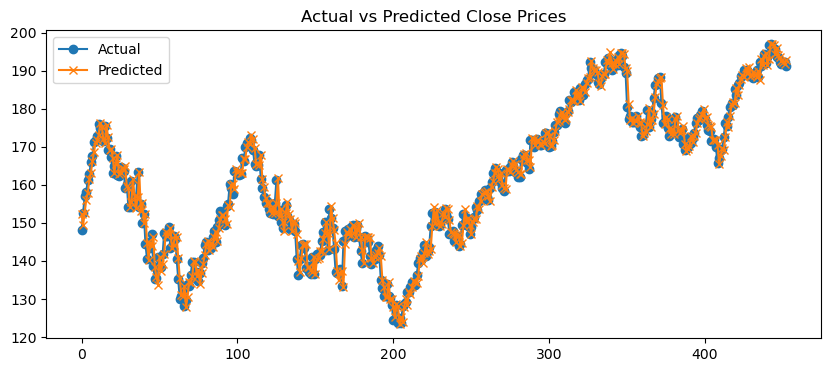

In [17]:
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Title
st.title("📈 Apple Stock Price Prediction App")

# Date range input
date_range = st.date_input("Select Date Range", [pd.to_datetime("2015-01-01"), pd.to_datetime("2024-01-01")])

# Load data
def load_data(start, end):
    df = yf.download("AAPL", start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df['Next Close'] = df['Close'].shift(-1)
    df.dropna(inplace=True)
    return df

# Fetch data
if len(date_range) == 2:
    df = load_data(date_range[0], date_range[1])
    st.write("### Raw Apple Stock Data", df.tail())

    # Feature and label
    X = df.drop('Next Close', axis=1)
    y = df['Next Close']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Model selection
    model_choice = st.selectbox("Choose a model", ["Linear Regression", "Random Forest", "XGBoost"])

    # Train model
    if model_choice == "Linear Regression":
        model = LinearRegression()
    elif model_choice == "Random Forest":
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    else:
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror')

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    st.write(f"**RMSE:** {rmse:.4f}")
    st.write(f"**R² Score:** {r2:.4f}")

    # Plot
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(y_test.values, label="Actual", marker='o')
    ax.plot(preds, label="Predicted", marker='x')
    ax.set_title("Actual vs Predicted Close Prices")
    ax.legend()
    st.pyplot(fig)

    # Download predictions
    output_df = X_test.copy()
    output_df['Actual Close'] = y_test.values
    output_df['Predicted Close'] = preds
    csv = output_df.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, "predictions.csv", "text/csv")
